In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sqlite3

In [2]:
conn = sqlite3.connect('steam.db')

df = pd.read_sql_query("SELECT * FROM gameplay;", conn)

In [3]:
df = df.drop(['index'], axis = 1)
df = df.drop_duplicates()

In [5]:
df.describe()

,appID,playtime
count,1.339385e+06,1.339385e+06
mean,2.899098e+05,1.181617e+03
std,1.977750e+05,1.079488e+04
min,1.000000e+01,1.000000e+00
25%,2.020900e+05,5.700000e+01
50%,2.705500e+05,1.750000e+02
75%,3.974600e+05,3.950000e+02
max,1.170820e+06,1.654162e+06


In [4]:
df.head()

,steamID,appID,playtime
0,76561198015016293,3910,1952
1,76561198015016293,13230,252
2,76561198015016293,12320,1137
3,76561198015016293,24740,59
4,76561198015016293,8980,4132


In [5]:
print("Unique Users: ", df['steamID'].nunique())
print("Unique Games: ", df['appID'].nunique())

Unique Users:  6092
Unique Games:  22489


In [6]:
df.playtime.describe()

count    1.339385e+06
mean     1.181617e+03
std      1.079488e+04
min      1.000000e+00
25%      5.700000e+01
50%      1.750000e+02
75%      3.950000e+02
max      1.654162e+06
Name: playtime, dtype: float64

In [7]:
df[df['playtime'] == df['playtime'].max()]

,steamID,appID,playtime
234193,76561198015375610,333600,1654162


The game with highest playtime from this dataset is a game called NekoPara Vol 1. 
https://steamdb.info/app/333600/

In [8]:
df[df['playtime'] == df['playtime'].min()].count()

steamID     41782
appID       41782
playtime    41782
dtype: int64

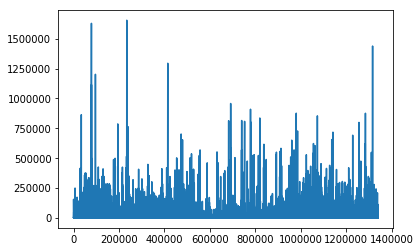

In [9]:
plt.plot(df['playtime'])
plt.show()

Distribution of playtime does not say much since each games 'replayability' and 'playthrough' vary. 

In [10]:
sum(df.groupby('appID').steamID.count() > 5)

13751

In [11]:
df.groupby('appID').steamID.count().sort_values(ascending = False)[:10]

appID
730       5132
550       3974
578080    3409
620       3159
49520     2839
218620    2813
105600    2794
4000      2675
271590    2481
400       2458
Name: steamID, dtype: int64

The game with most number of users playing it in this dataset is CS:GO. Followed by Left 4 Dead 2.   
By the process in which we're scraping the data, this makes sense. We're going by the friendslist of each steamID. If they're playing CS:GO, they're most likely making friends who also play CS:GO, a multiplayer FPS. 

In [12]:
played = df.groupby('appID').steamID.count().sort_values(ascending = False)

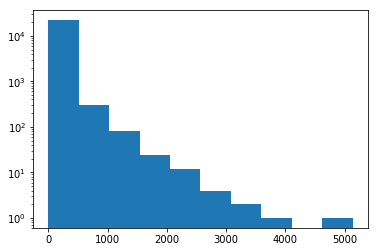

In [13]:
plt.hist(played)
plt.yscale('log')
plt.show()

In [14]:
app_total_playtime = df.groupby('appID').playtime.mean()

In [15]:
df_fix = df.join(app_total_playtime, how='left', on='appID', rsuffix='a_')

In [16]:
df['pt_by_app'] = df_fix.playtime /df_fix.playtimea_

In [17]:
user_total_playtime = df.groupby('steamID').playtime.median()

In [18]:
df_fix = df.join(user_total_playtime, how='left', on = 'steamID', rsuffix='a_')

In [19]:
df['pt_by_user'] = df_fix.playtime / df_fix.playtimea_

In [20]:
df['rating'] = df['pt_by_app'] * df['pt_by_user']

In [21]:
df.head()

,steamID,appID,playtime,pt_by_app,pt_by_user,rating
0,76561198015016293,3910,1952,4.442400,5.707602,25.355453
1,76561198015016293,13230,252,0.803394,0.736842,0.591975
2,76561198015016293,12320,1137,1.530854,3.324561,5.089417
3,76561198015016293,24740,59,0.140930,0.172515,0.024312
4,76561198015016293,8980,4132,1.816186,12.081871,21.942921


In [22]:
df.describe()

,appID,playtime,pt_by_app,pt_by_user,rating
count,1.339385e+06,1.339385e+06,1.339385e+06,1.339385e+06,1.339385e+06
mean,2.899098e+05,1.181617e+03,1.000000e+00,8.543765e+00,8.808822e+01
std,1.977750e+05,1.079488e+04,3.753305e+00,3.966443e+02,1.056194e+04
min,1.000000e+01,1.000000e+00,1.510186e-05,3.826140e-05,1.063722e-08
25%,2.020900e+05,5.700000e+01,1.434969e-01,3.975155e-01,6.418406e-02
50%,2.705500e+05,1.750000e+02,5.161122e-01,1.000000e+00,5.305961e-01
75%,3.974600e+05,3.950000e+02,1.089913e+00,2.235537e+00,2.002959e+00
max,1.170820e+06,1.654162e+06,8.731109e+02,3.035320e+05,9.774025e+06


In [23]:
df[df['rating'] == df.rating.max()]

,steamID,appID,playtime,pt_by_app,pt_by_user,rating
995113,76561197994044568,240,303532,32.20097,303532.0,9.774025e+06


In [24]:
df[df.steamID == '76561197994044568']

,steamID,appID,playtime,pt_by_app,pt_by_user,rating
995113,76561197994044568,240,303532,32.200970,303532.0,9.774025e+06
995114,76561197994044568,730,117289,2.891381,117289.0,3.391272e+05
995115,76561197994044568,252150,101,0.567266,101.0,5.729387e+01
995116,76561197994044568,304050,9,0.002335,9.0,2.101179e-02
995117,76561197994044568,429680,1,0.002210,1.0,2.209868e-03
995118,76561197994044568,459820,1,0.000471,1.0,4.707132e-04
995119,76561197994044568,531640,1,0.000320,1.0,3.201411e-04
995120,76561197994044568,578080,4751,0.235913,4751.0,1.120825e+03
995121,76561197994044568,351940,89,0.367534,89.0,3.271055e+01
995122,76561197994044568,591960,1,0.000856,1.0,8.561644e-04


(array([1.339123e+06, 1.840000e+02, 4.500000e+01, 1.100000e+01,
        9.000000e+00, 4.000000e+00, 2.000000e+00, 2.000000e+00,
        3.000000e+00, 2.000000e+00]),
 array([1.51018621e-05, 8.73111019e+01, 1.74622189e+02, 2.61933275e+02,
        3.49244362e+02, 4.36555449e+02, 5.23866536e+02, 6.11177623e+02,
        6.98488709e+02, 7.85799796e+02, 8.73110883e+02]),
 <a list of 10 Patch objects>)

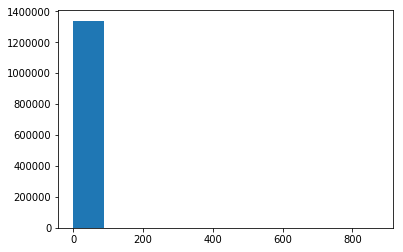

In [25]:
plt.hist(df.pt_by_app)

(array([187558.,  88845.,  65954.,  54240.,  48376.,  44979.,  43050.,
         41327.,  40953.,  41558.]),
 array([1.51018621e-05, 5.00131271e-02, 1.00011152e-01, 1.50009177e-01,
        2.00007203e-01, 2.50005228e-01, 3.00003253e-01, 3.50001278e-01,
        3.99999304e-01, 4.49997329e-01, 4.99995354e-01]),
 <a list of 10 Patch objects>)

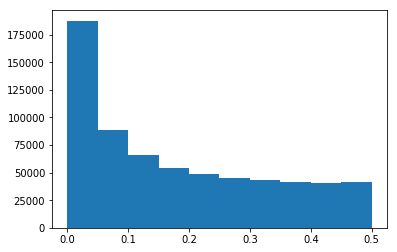

In [26]:
plt.hist(df[df.pt_by_app < .5].pt_by_app)

We need to remove the games that have been played by less users. 

In [27]:
df.groupby('steamID').appID.nunique().sort_values(ascending = False)[:10]

steamID
76561198017851315    11476
76561197971026489     8627
76561197995008105     7706
76561198026221141     7680
76561197965978376     7489
76561198037867621     7486
76561198025653291     6855
76561198019466684     6613
76561198002555892     6509
76561197974679102     6461
Name: appID, dtype: int64

In [28]:
sum(df.groupby('steamID').appID.nunique() > 1)

5978

In [88]:
sum(df.groupby('appID').steamID.nunique() > 5)

13750

In [89]:
sum(df.groupby('steamID').appID.nunique() > 5)

5593

In [87]:
df.head()

,steamID,appID,playtime,pt_by_app,pt_by_user,rating,fixfix
0,76561198015016293,3910,1952,4.442400,5.707602,25.355453,10.00
1,76561198015016293,13230,252,0.803394,0.736842,0.591975,10.00
2,76561198015016293,12320,1137,1.530854,3.324561,5.089417,10.00
3,76561198015016293,24740,59,0.140930,0.172515,0.024312,2.36
4,76561198015016293,8980,4132,1.816186,12.081871,21.942921,10.00


In [30]:
sum(df.groupby('steamID').appID.nunique() > 10)

5251

In [31]:
user_games = df.groupby('steamID').appID.nunique().sort_values(ascending = False)

(array([5.927e+03, 9.300e+01, 3.800e+01, 8.000e+00, 1.400e+01, 6.000e+00,
        4.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([1.00000e+00, 1.14850e+03, 2.29600e+03, 3.44350e+03, 4.59100e+03,
        5.73850e+03, 6.88600e+03, 8.03350e+03, 9.18100e+03, 1.03285e+04,
        1.14760e+04]),
 <a list of 10 Patch objects>)

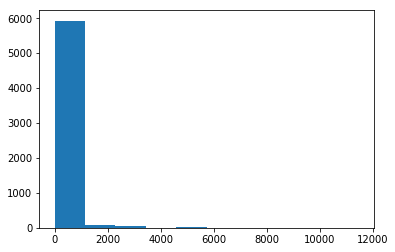

In [32]:
plt.hist(user_games)

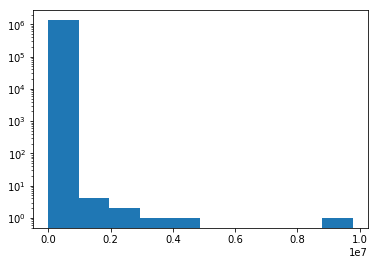

In [33]:
plt.hist(df.rating)
plt.yscale('log')
plt.show()

In [59]:
yeeter = df.groupby('appID').count()['steamID']

In [62]:
yeeter2 = yeeter[yeeter > 5]

In [63]:
blah = df.join(yeeter2, how='left', on='appID', rsuffix='_yeet')

In [64]:
blah[blah.appID == 1210]

,steamID,appID,playtime,pt_by_app,pt_by_user,rating,steamID_yeet
95944,76561197960667971,1210,369,1.994595,2.963855,5.911690,NaN
533351,76561197963550511,1210,1,0.005405,0.009434,0.000051,NaN


In [65]:
blah = blah.dropna()
blah = blah.drop(['steamID_yeet'], axis = 1)

In [ ]:
app_total_playtime = df.groupby('appID').playtime.mean()
df_fix = df.join(app_total_playtime, how='left', on='appID', rsuffix='a_')
df['pt_by_app'] = df_fix.playtime /df_fix.playtimea_

user_total_playtime = df.groupby('steamID').playtime.mean()
df_fix = df.join(user_total_playtime, how='left', on = 'steamID', rsuffix='a_')
df['pt_by_user'] = df_fix.playtime / df_fix.playtimea_

df['rating'] = df['pt_by_app'] * df['pt_by_user']
df['rating_fix'] = ((df.rating - df.rating.min()) / df.rating.max()) * 10.0

df['ten'] = 1 + (df.rating - df.rating.min()) * 9.0 / (df.rating.max() - df.rating.min())

In [70]:
atp = df.groupby('appID').playtime.median()

In [72]:
df_fix = df.join(atp, how='left', on='appID', rsuffix='_m')

In [75]:
df['fixfix'] = (df_fix.playtime / df_fix.playtime_m) * 5.0

In [79]:
df.loc[df.fixfix > 10, 'fixfix'] = 10

(array([197975., 110220., 116133., 111503., 144959., 115095.,  77343.,
         57462.,  44289., 364406.]),
 array([2.59598660e-04, 1.00023364e+00, 2.00020768e+00, 3.00018172e+00,
        4.00015576e+00, 5.00012980e+00, 6.00010384e+00, 7.00007788e+00,
        8.00005192e+00, 9.00002596e+00, 1.00000000e+01]),
 <a list of 10 Patch objects>)

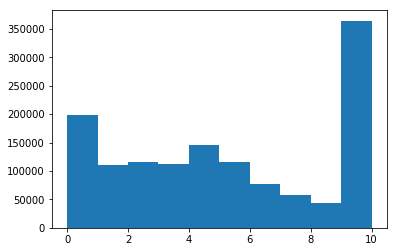

In [82]:
plt.hist(df.fixfix)